In [1]:
import rppfitting
import numpy as np
import matplotlib.pyplot as plt

# Test Case

In [58]:
x = np.arange(18000)
rise = 1250
top = 200
decay = 1250
t0 = 3500
originalSignal = np.zeros(len(x))
originalSignal[t0:] = rppfitting.expFit(x-t0, 1000, decay, 0)[t0:]
originalSignal[10000:] = 0.0

singleTrap = rppfitting.defineSingleTrap(rise, top, decay)
trapX = np.arange(len(singleTrap))

filters = rppfitting.defineFilters(singleTrap, [(0, rise), (rise, rise + top), (rise+top, rise+top+rise)], [2, 1, 2])

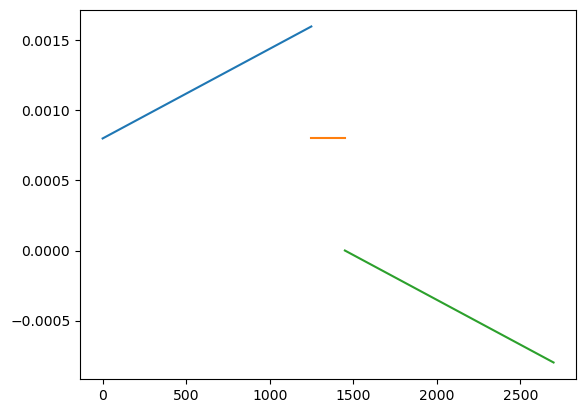

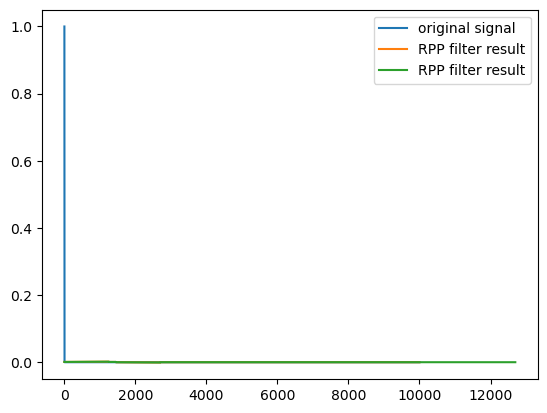

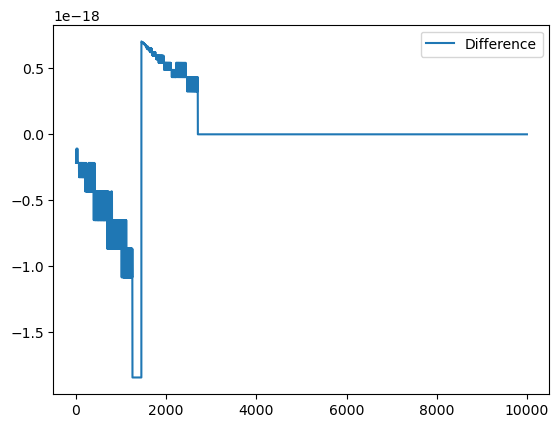

In [88]:
plt.plot(trapX[0:rise], singleTrap[0:rise])
plt.plot(trapX[rise:rise+top], singleTrap[rise:rise+top])
plt.plot(trapX[rise+top:rise+top+rise], singleTrap[rise+top:rise+top+rise])
plt.show()

convOut = np.convolve(originalSignal, singleTrap)

output = rppfitting.arbOrderArbNumber(originalSignal, filters)
plt.plot(originalSignal, label='original signal')
plt.plot(output, label='RPP filter result')
plt.plot(convOut, label='RPP filter result')
#plt.plot(convOut, label='Traditional Convolution')
plt.legend()
plt.show()

plt.plot(output-convOut[:len(originalSignal)], label='Difference')
#plt.plot(convOut, label='Traditional Convolution')
plt.legend()
plt.show()

## Fixed Precision Version

In [97]:
for f in filters:
    print(1.0/f['cPrimes'])

[1.2510008e+03 1.5625000e+06]
[1250.]
[ 1562499.99999828 -1562500.        ]


In [98]:
for f in filters:
    print(f)

{order: [2.], cPrimes: [7.9936e-04 6.4000e-07], delay: [1250.], lambdas: [1.00000e+00 1.25000e+03 7.81875e+05]}
{order: [1.], cPrimes: [0.0008], delay: [200.], lambdas: [  1. 200.]}
{order: [2.], cPrimes: [ 6.4e-07 -6.4e-07], delay: [1250.], lambdas: [1.00000e+00 1.25000e+03 7.81875e+05]}


In [89]:
outputFloat = rppfitting.arbOrderArbNumber(originalSignal, filters)

In [90]:
outputFixed = rppfitting.arbOrderArbNumberFixed(originalSignal, filters, n_word=64, n_frac=32)

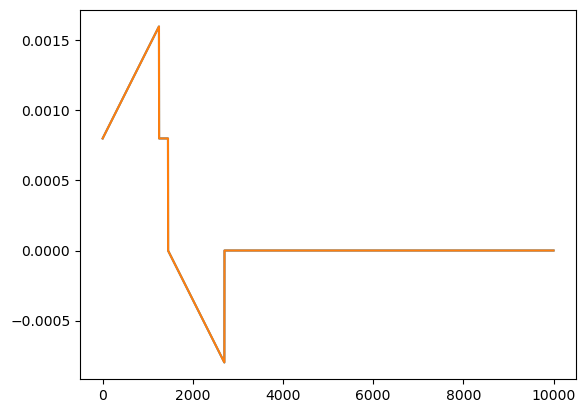

In [91]:
plt.plot(np.array(outputFloat))
plt.plot(np.array(outputFixed))

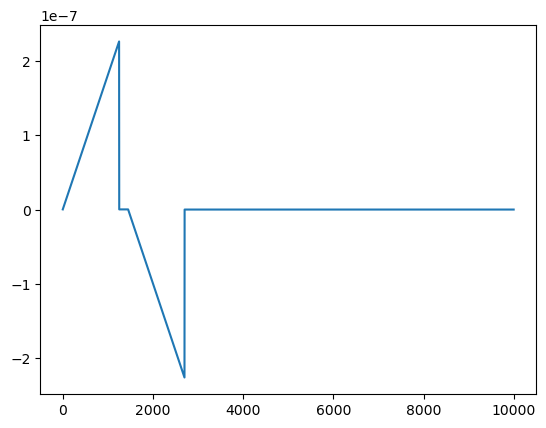

In [92]:
plt.plot(np.array(outputFloat)-np.array(outputFixed))

In [93]:
print(convOut[-1],outputFloat[-1], outputFixed[-1])

0.0 0.0 0.0


In [94]:
(np.array(outputFloat) - np.array(outputFixed))[-1]

0.0

In [74]:
originalSignal = np.zeros(10000)
originalSignal[0] = 1.0
error = rppfitting.arbOrderArbNumberFixed(originalSignal, filters, n_word=128, n_frac=64)

In [79]:
np.sum(singleTrap)

1.1600000000000001

In [78]:
np.sum(error)

1.1600000000000004